<a href="https://colab.research.google.com/github/mmoran90/death-classification/blob/main/3Copy_of_final_project_eda_km_updates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Katie Mears - Final Project
Reclassifying Undetermined Deaths
EDA

### Load Packages

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read Data and Explore Variables

In [6]:
# Read in the 2015_data
death_data = pd.read_csv('2015_data.csv')
# Display the first few rows of the data
print(death_data.head())

   resident_status  education_1989_revision  education_2003_revision  \
0                1                      NaN                      3.0   
1                1                      NaN                      6.0   
2                1                      NaN                      3.0   
3                1                      NaN                      3.0   
4                1                      NaN                      5.0   

   education_reporting_flag  month_of_death sex  detail_age_type  detail_age  \
0                         1               1   M                1          84   
1                         1               1   M                1          70   
2                         1               1   F                1          91   
3                         1               1   F                1          40   
4                         1               1   F                1          89   

   age_substitution_flag  age_recode_52  ...  record_condition_18  \
0                

<ipython-input-6-706664e4080e>:2: DtypeWarning: Columns (41,42,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  death_data = pd.read_csv('2015_data.csv')


In [7]:
# Print Column Titles in Original Data Set
column_titles = death_data.columns
print(column_titles)

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

In [8]:
# Data Description of Original data set (2015_data.csv)
data_description_all = death_data.describe(include='all')
print(data_description_all)

        resident_status  education_1989_revision  education_2003_revision  \
count      75306.000000             50870.000000             24436.000000   
unique              NaN                      NaN                      NaN   
top                 NaN                      NaN                      NaN   
freq                NaN                      NaN                      NaN   
mean           1.233262                12.522607                 3.296120   
std            0.484821                 8.844328                 1.661875   
min            1.000000                 0.000000                 1.000000   
25%            1.000000                11.000000                 2.000000   
50%            1.000000                12.000000                 3.000000   
75%            1.000000                14.000000                 4.000000   
max            4.000000                99.000000                 9.000000   

        education_reporting_flag  month_of_death    sex  detail_age_type  \

In [9]:
# Convert manner_of_death to homicide or not homicide
death_data['manner_of_death'] = death_data['manner_of_death'].replace([1, 2, 4, 5, 6, 7, None],0)
death_data['manner_of_death'] = death_data['manner_of_death'].replace([3],1)

### Missing Data

In [10]:
# Print Missing Values per Column
missing_values_count = death_data.isnull().sum()
print(missing_values_count)

resident_status                   0
education_1989_revision       24436
education_2003_revision       50870
education_reporting_flag          0
month_of_death                    0
                              ...  
race_imputation_flag          74871
race_recode_3                     1
race_recode_5                     1
hispanic_origin                   1
hispanic_originrace_recode        1
Length: 77, dtype: int64


In [11]:
# Print Missing Data as percentage (per column)
total_rows = death_data.shape[0]
percent_missing = (missing_values_count / total_rows) * 100
print(percent_missing)

resident_status                0.000000
education_1989_revision       32.448942
education_2003_revision       67.551058
education_reporting_flag       0.000000
month_of_death                 0.000000
                                ...    
race_imputation_flag          99.422357
race_recode_3                  0.001328
race_recode_5                  0.001328
hispanic_origin                0.001328
hispanic_originrace_recode     0.001328
Length: 77, dtype: float64


In [12]:
total_missing_values = death_data.isnull().sum().sum()
total_elements = death_data.size
total_percent_missing = (total_missing_values / total_elements) * 100
print("Total percentage of missing data in the dataset: {:.2f}%".format(total_percent_missing))

Total percentage of missing data in the dataset: 55.56%


In [13]:
# Isolate the Desired Columns
desired_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death', 'method_of_disposition',
                   'autopsy', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '39_cause_recode', 'race','detail_age']
new_death = death_data[desired_columns]

# List of column names to convert to categorical
categorical_columns = ['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status',
                   'marital_status', 'day_of_week_of_death', 'injury_at_work', 'manner_of_death',
                   'method_of_disposition', 'autopsy', 'icd_code_10th_revision', '358_cause_recode',
                   '113_cause_recode', '39_cause_recode', 'race']

# Convert the selected columns to categorical
new_death[categorical_columns] = new_death[categorical_columns].astype('category')
print(new_death.head())

  education_2003_revision month_of_death sex  \
0                     3.0              1   M   
1                     6.0              1   M   
2                     3.0              1   F   
3                     3.0              1   F   
4                     5.0              1   F   

  place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                   1              M                    1   
1                                   1              M                    2   
2                                   4              W                    6   
3                                   4              S                    5   
4                                   6              W                    5   

  injury_at_work manner_of_death method_of_disposition autopsy  \
0              U             0.0                     B       N   
1              U             0.0                     C       N   
2              U             0.0                  

<ipython-input-13-10db1edd9b90>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_death[categorical_columns] = new_death[categorical_columns].astype('category')


In [14]:
# Get the data types for all columns
data_types = new_death.dtypes

print(data_types)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
icd_code_10th_revision                 category
358_cause_recode                       category
113_cause_recode                       category
39_cause_recode                        category
race                                   category
detail_age                                int64
dtype: object


In [15]:
total_missing_values2 = new_death.isnull().sum().sum()
total_elements2 = new_death.size
total_percent_missing2 = (total_missing_values2 / total_elements2) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing2))

Total percentage of missing data in the sample dataset: 4.43%


In [16]:
# Drop rows with missing values
death_dropped = new_death.dropna()

print("DataFrame after dropping rows with missing values:")
print(death_dropped)

DataFrame after dropping rows with missing values:
      education_2003_revision month_of_death sex  \
0                         3.0              1   M   
1                         6.0              1   M   
2                         3.0              1   F   
3                         3.0              1   F   
4                         5.0              1   F   
...                       ...            ...  ..   
75300                     3.0              8   M   
75301                     2.0              8   M   
75302                     3.0              8   M   
75303                     3.0              7   M   
75304                     2.0              8   M   

      place_of_death_and_decedents_status marital_status day_of_week_of_death  \
0                                       1              M                    1   
1                                       1              M                    2   
2                                       4              W                    6   


In [17]:
total_missing_values3 = death_dropped.isnull().sum().sum()
total_elements3 = death_dropped.size
total_percent_missing3 = (total_missing_values3 / total_elements3) * 100
print("Total percentage of missing data in the sample dataset: {:.2f}%".format(total_percent_missing3))

Total percentage of missing data in the sample dataset: 0.00%


In [18]:
summary_stats = death_dropped.describe()
print(summary_stats)

        detail_age
count  24435.00000
mean      70.88807
std       18.38804
min        1.00000
25%       61.00000
50%       74.00000
75%       84.00000
max      116.00000


In [19]:
import random
import numpy as np

### Random Sample

In [20]:
# Perform random sampling
sampled_df = death_dropped.sample(frac=0.07, random_state=1)
print('Number of rows after random sampling = %d' % (sampled_df.shape[0]))

print(sampled_df.head())

Number of rows after random sampling = 1710
      education_2003_revision month_of_death sex  \
64875                     2.0              6   F   
61082                     3.0              1   F   
63792                     5.0              4   F   
55219                     6.0              1   F   
183                       5.0              1   M   

      place_of_death_and_decedents_status marital_status day_of_week_of_death  \
64875                                   1              M                    7   
61082                                   6              W                    1   
63792                                   4              W                    2   
55219                                   4              M                    2   
183                                     4              D                    5   

      injury_at_work manner_of_death method_of_disposition autopsy  \
64875              U             0.0                     B       N   
61082           

In [21]:
# Value Counts for each Categorical Variable
education_counts = sampled_df['education_2003_revision'].value_counts()
print("education_2003_revision Frequency:")
print(education_counts)

month_of_death_counts = sampled_df['month_of_death'].value_counts()
print("month_of_death Frequency:")
print(month_of_death_counts)

sex_counts = sampled_df['sex'].value_counts()
print("sex Frequency:")
print(sex_counts)

place_of_death_and_decedents_status_counts = sampled_df['place_of_death_and_decedents_status'].value_counts()
print("place_of_death_and_decedents_status Frequency:")
print(place_of_death_and_decedents_status_counts)

marital_status_counts = sampled_df['marital_status'].value_counts()
print("marital_status Frequency:")
print(marital_status_counts)

day_of_week_of_death_counts = sampled_df['day_of_week_of_death'].value_counts()
print("day_of_week_of_death Frequency:")
print(day_of_week_of_death_counts)

injury_at_work_counts = sampled_df['injury_at_work'].value_counts()
print("injury_at_work Frequency:")
print(injury_at_work_counts)

manner_of_death_counts = sampled_df['manner_of_death'].value_counts()
print("manner_of_death Frequency:")
print(manner_of_death_counts)

method_of_disposition_counts = sampled_df['method_of_disposition'].value_counts()
print("method_of_disposition Frequency:")
print(method_of_disposition_counts)

autopsy_counts = sampled_df['autopsy'].value_counts()
print("autopsy Frequency:")
print(autopsy_counts)

race_counts = sampled_df['race'].value_counts()
print("race Frequency:")
print(race_counts)


education_2003_revision Frequency:
3.0    780
4.0    230
1.0    216
2.0    206
6.0    114
5.0     89
7.0     41
9.0     18
8.0     16
Name: education_2003_revision, dtype: int64
month_of_death Frequency:
1     234
3     228
2     223
7     193
4     190
5     185
6     185
8     148
9      50
10     27
12     24
11     23
Name: month_of_death, dtype: int64
sex Frequency:
M    860
F    850
Name: sex, dtype: int64
place_of_death_and_decedents_status Frequency:
4    542
1    485
6    275
5    183
2    139
7     79
3      7
9      0
Name: place_of_death_and_decedents_status, dtype: int64
marital_status Frequency:
M    625
W    556
D    318
S    198
U     13
Name: marital_status, dtype: int64
day_of_week_of_death Frequency:
4    266
6    255
2    247
1    243
7    235
5    234
3    230
Name: day_of_week_of_death, dtype: int64
injury_at_work Frequency:
U    1559
N     147
Y       4
Name: injury_at_work, dtype: int64
manner_of_death Frequency:
0.0    1699
1.0      11
Name: manner_of_death, dt

### Remove Outliers

In [22]:
# Compute z-score for every data point in detail_age
sampled_df['z_detail_age'] = (sampled_df['detail_age']-sampled_df['detail_age'].mean())/sampled_df['detail_age'].std()
print('Number of rows before discarding outliers = %d' % (sampled_df.shape[0]))

# Removes rows with a zscore beyond 3 or -3
sampled_df = sampled_df[(sampled_df['z_detail_age'] <= 3) & (sampled_df['z_detail_age'] >= -3)]
print('Number of rows after discarding missing values = %d' % (sampled_df.shape[0]))

# Drop the 'C' column
column_name = 'z_detail_age'
sampled_df.drop(column_name, axis=1, inplace=True)

Number of rows before discarding outliers = 1710
Number of rows after discarding missing values = 1687


<ipython-input-22-c14516b41af4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.drop(column_name, axis=1, inplace=True)


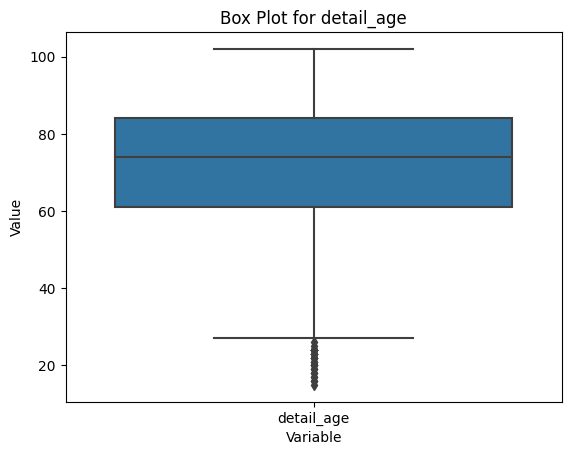

In [23]:
# Non-Normalized Sample
sns.boxplot(data=sampled_df[['detail_age']])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title("Box Plot for detail_age")
plt.show()

### Class Imbalances

In [24]:
# Calculate class proportions
class_proportions = sampled_df['manner_of_death'].value_counts(normalize=True)

print(class_proportions)

0.0    0.994072
1.0    0.005928
Name: manner_of_death, dtype: float64


In [25]:
# Get the data types for all columns in sampled_df
data_types2 = sampled_df.dtypes
print(data_types2)

education_2003_revision                category
month_of_death                         category
sex                                    category
place_of_death_and_decedents_status    category
marital_status                         category
day_of_week_of_death                   category
injury_at_work                         category
manner_of_death                        category
method_of_disposition                  category
autopsy                                category
icd_code_10th_revision                 category
358_cause_recode                       category
113_cause_recode                       category
39_cause_recode                        category
race                                   category
detail_age                                int64
dtype: object


In [26]:
# pip install imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier

In [27]:
# Sample data: Replace this with your own data
X_train, y_train = ..., ...  # Your training data and labels

# Create and train the Balanced Random Forest classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred = brf.predict(X_test)

TypeError: ignored

### Normalize Data and Encode Categorical Variables

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Normalize detail_age using Min-Max scaler
mms = MinMaxScaler()
sampled_df[['detail_age']] = mms.fit_transform(sampled_df[['detail_age']])
print(sampled_df)

      education_2003_revision month_of_death sex  \
64875                     2.0              6   F   
61082                     3.0              1   F   
63792                     5.0              4   F   
55219                     6.0              1   F   
183                       5.0              1   M   
...                       ...            ...  ..   
71058                     2.0              7   M   
69213                     1.0              7   F   
60003                     3.0              1   F   
3128                      3.0             10   M   
1852                      5.0              6   F   

      place_of_death_and_decedents_status marital_status day_of_week_of_death  \
64875                                   1              M                    7   
61082                                   6              W                    1   
63792                                   4              W                    2   
55219                                   4          

In [30]:
# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(sampled_df, columns=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race', 'manner_of_death'],
                            prefix=['education_2003_revision', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'injury_at_work','method_of_disposition', 'autopsy', 'race', 'manner_of_death'])
print(encoded_df)

      icd_code_10th_revision 358_cause_recode 113_cause_recode  \
64875                   I119              207               56   
61082                   G311              194              111   
63792                   I629              236               70   
55219                   E119              159               46   
183                     E145              159               46   
...                      ...              ...              ...   
71058                   I500              230               67   
69213                   C349               93               27   
60003                   C259               88               25   
3128                    C189               81               23   
1852                    J449              267               86   

      39_cause_recode  detail_age  education_2003_revision_1.0  \
64875              20    0.712644                            0   
61082              37    0.873563                            0   
63792    

### Column Distributions

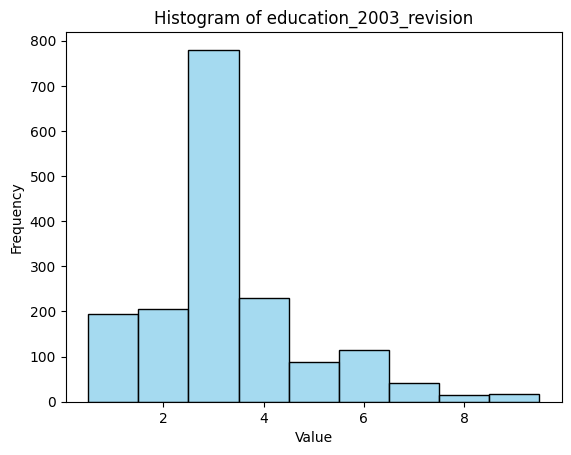

In [31]:
education_2003_revision  = sampled_df['education_2003_revision']
sns.histplot(education_2003_revision, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of education_2003_revision')
plt.show()

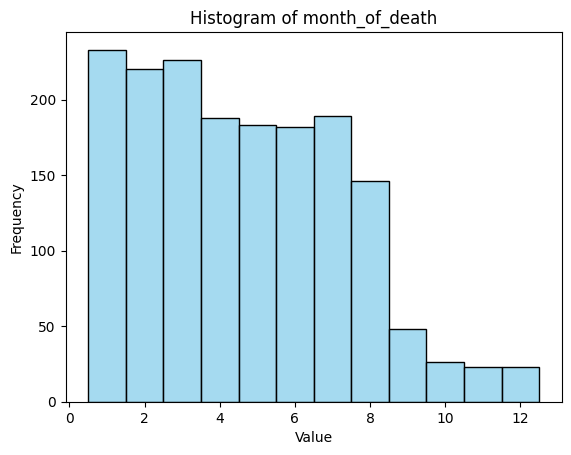

In [32]:
month_of_death = sampled_df['month_of_death']
sns.histplot(month_of_death, bins=12
             , color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of month_of_death')
plt.show()

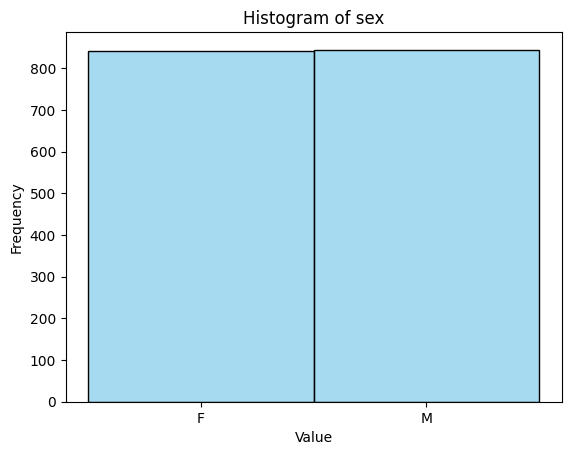

In [33]:
sex = sampled_df['sex']
sns.histplot(sex, bins=2, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex')
plt.show()

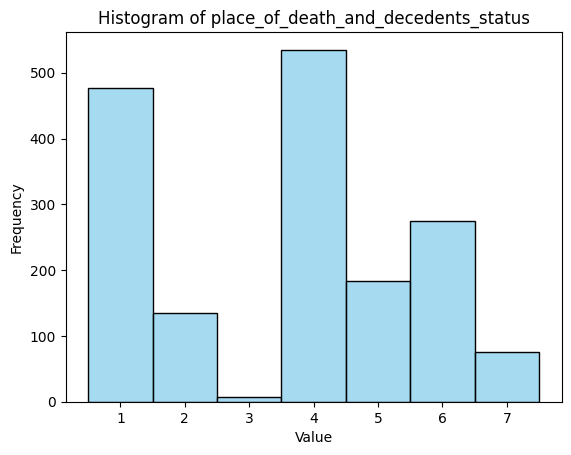

In [34]:
place_of_death_and_decedents_status = sampled_df['place_of_death_and_decedents_status']
sns.histplot(place_of_death_and_decedents_status, bins=9, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of place_of_death_and_decedents_status')
plt.show()

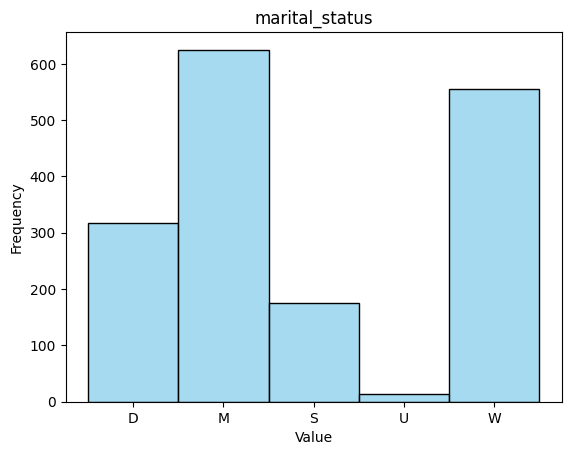

In [35]:
marital_status = sampled_df['marital_status']
sns.histplot(marital_status, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('marital_status')
plt.show()

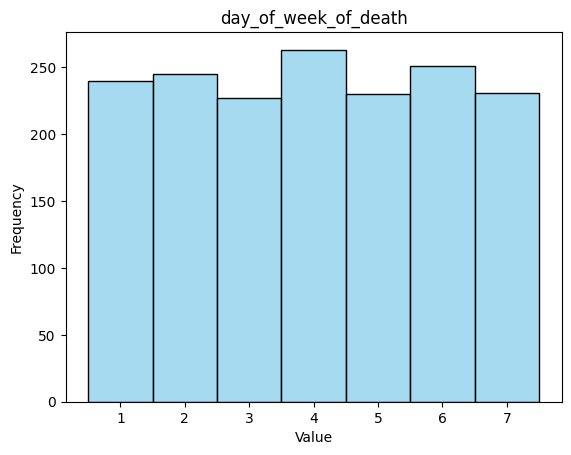

In [36]:
day_of_week_of_death = sampled_df['day_of_week_of_death']
sns.histplot(day_of_week_of_death, bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('day_of_week_of_death')
plt.show()

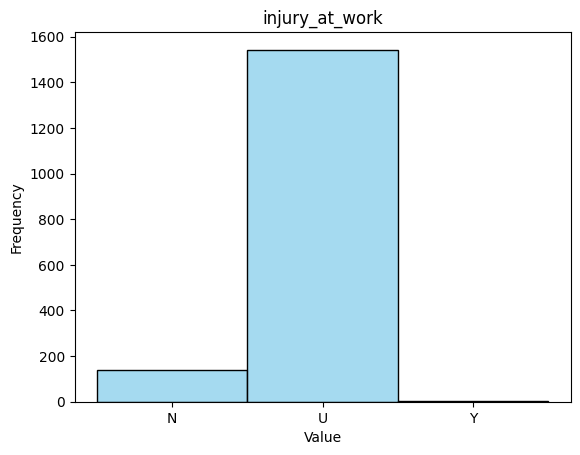

In [37]:
injury_at_work = sampled_df['injury_at_work']
sns.histplot(injury_at_work, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('injury_at_work')
plt.show()

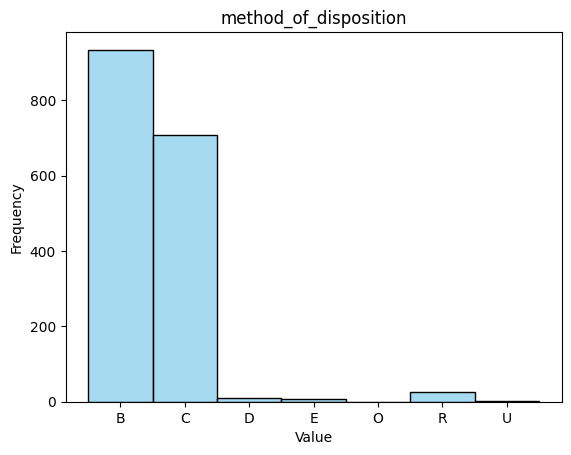

In [38]:
method_of_disposition = sampled_df['method_of_disposition']
sns.histplot(method_of_disposition, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('method_of_disposition')
plt.show()

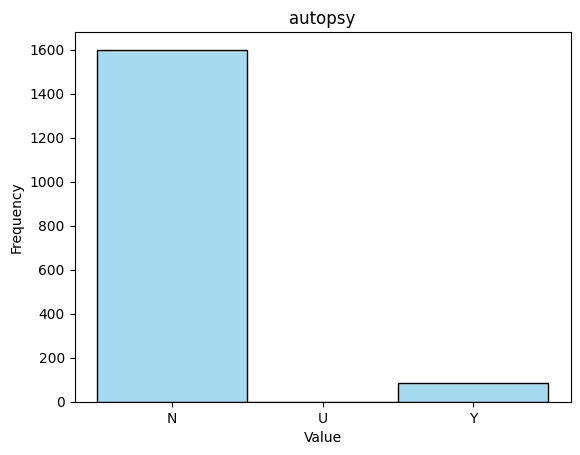

In [39]:
autopsy = sampled_df['autopsy']
sns.histplot(autopsy, bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('autopsy')
plt.show()

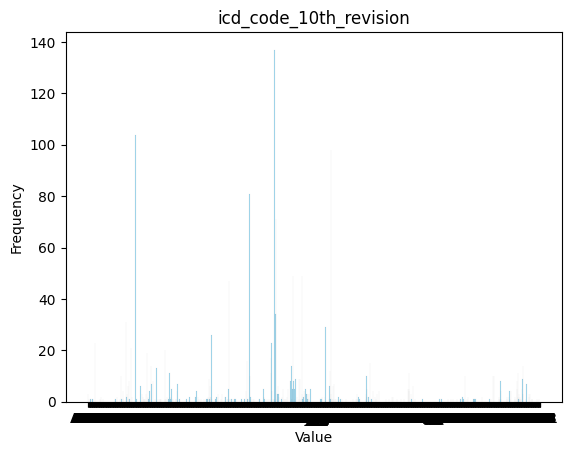

In [40]:
icd_code_10th_revision = sampled_df['icd_code_10th_revision']
sns.histplot(icd_code_10th_revision, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('icd_code_10th_revision')
plt.show()

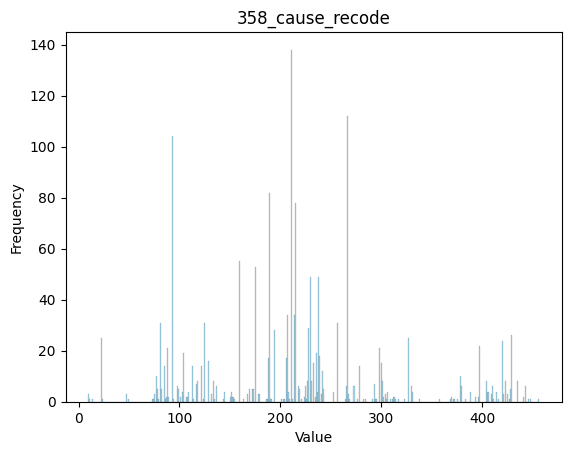

In [41]:
cause_recode358 = sampled_df['358_cause_recode']
sns.histplot(cause_recode358, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('358_cause_recode')
plt.show()

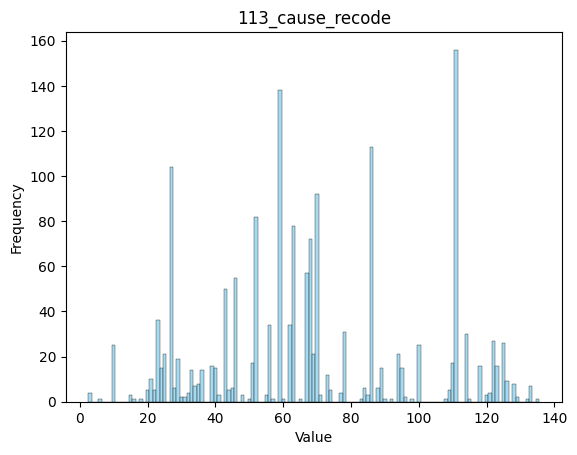

In [42]:
cause_recode113 = sampled_df['113_cause_recode']
sns.histplot(cause_recode113, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('113_cause_recode')
plt.show()

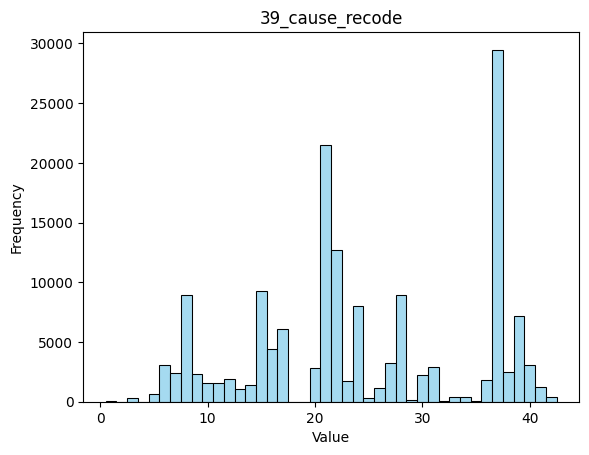

In [ ]:
cause_recode39 = sampled_df['39_cause_recode']
sns.histplot(cause_recode39, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('39_cause_recode')
plt.show()

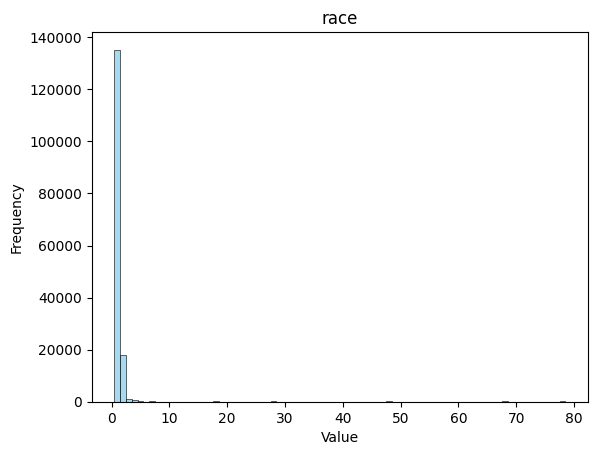

In [ ]:
race = sampled_df['race']
sns.histplot(race, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('race')
plt.show()

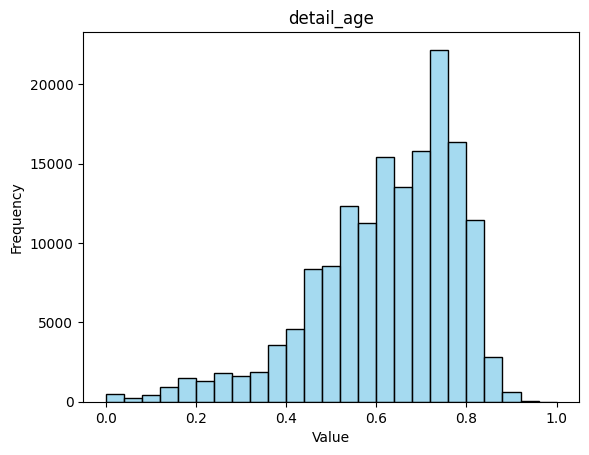

In [ ]:
detail_age = sampled_df['detail_age']
sns.histplot(detail_age, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('detail_age')
plt.show()

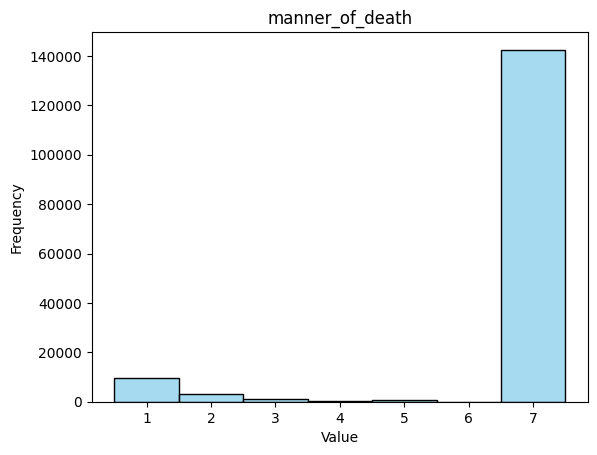

In [ ]:
manner_of_death = sampled_df['manner_of_death']
sns.histplot(manner_of_death, bins=7, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('manner_of_death')
plt.show()

### Correlations

In [43]:
sampled_df = sampled_df.dropna()

In [47]:
# pip install prince
import prince

ModuleNotFoundError: ignored

In [45]:
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Perform MCA
mca = prince.MCA(n_components=16)
mca.fit(sampled_df)

# Access the eigenvalues and calculate the explained variance ratio
eigenvalues = mca.eigenvalues_
total_variance = sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Access the results
print("Eigenvalues:")
print(mca.eigenvalues_)


print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


print("\nPrincipal Coordinates:")
print(mca.row_coordinates(sampled_df))  # Coordinates of rows (observations)
print(mca.column_coordinates(sampled_df))  # Coordinates of columns (categories)


NameError: ignored

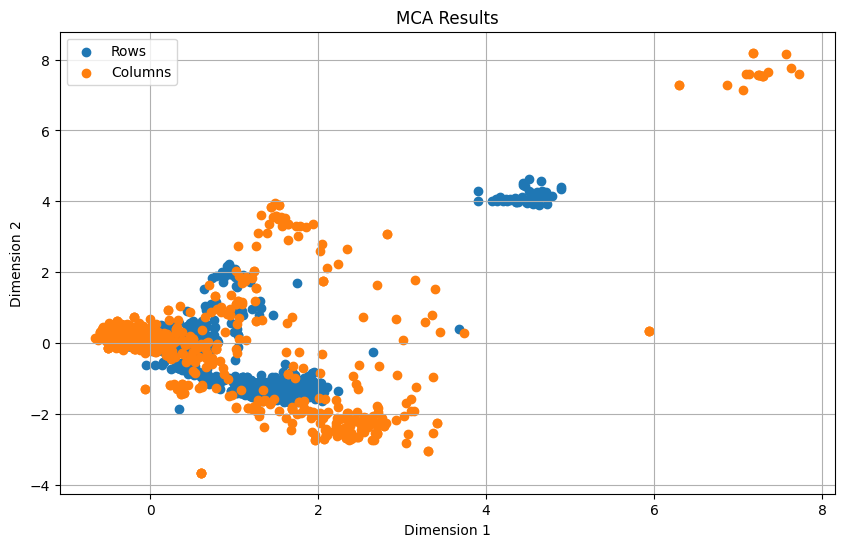

In [ ]:
# Plot MCA results
plt.figure(figsize=(10, 6))
plt.scatter(mca.row_coordinates(sampled_df).iloc[:, 0], mca.row_coordinates(sampled_df).iloc[:, 1], label='Rows')
plt.scatter(mca.column_coordinates(sampled_df).iloc[:, 0], mca.column_coordinates(sampled_df).iloc[:, 1], label='Columns')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:

# import matplotlib.pyplot as plt
# !pip install pandas scipy
from scipy.stats import chi2_contingency





In [ ]:
# Convert the categorical data to numerical labels (optional if already numeric)
for column in sampled_df.columns:
    sampled_df[column] = pd.Categorical(sampled_df[column]).codes

# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['detail_age'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.3301397857143287


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['race'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.09587966641140015


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['sex'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.047815850260538736


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['autopsy'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.29631900572314135


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['marital_status'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.15263745525286349


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['month_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.0


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['education_2003_revision'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.049919284262263774


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['day_of_week_of_death'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.0


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.27210948050343914


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['method_of_disposition'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.06302665133438425


In [ ]:
# Calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create a contingency table for the two categorical variables
confusion_matrix = pd.crosstab(sampled_df['manner_of_death'], sampled_df['injury_at_work'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print("Cramér's V:", cramers_v_value)

Cramér's V: 0.27210948050343914


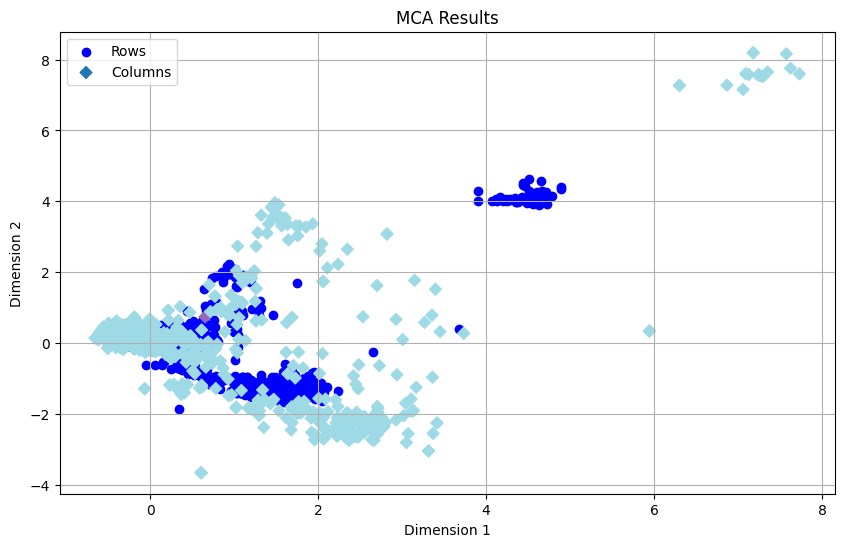

In [ ]:
# Plot MCA results
plt.figure(figsize=(10, 6))

# Scatter plot for rows with different colors
row_coords = mca.row_coordinates(sampled_df)
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='blue', label='Rows')

# Scatter plot for columns with different colors
column_coords = mca.column_coordinates(sampled_df)
num_categories = column_coords.shape[0]
colors = plt.cm.tab20(np.arange(num_categories))  # Using tab20 colormap with 20 colors
plt.scatter(column_coords.iloc[:, 0], column_coords.iloc[:, 1], c=colors, marker='D', label='Columns')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('MCA Results')
plt.grid()
plt.show()

In [ ]:
# Correlation
# numeric_columns = sampled_df.select_dtypes(include='number')
# death_correlation_matrix = numeric_columns.corr()
# print(death_correlation_matrix)

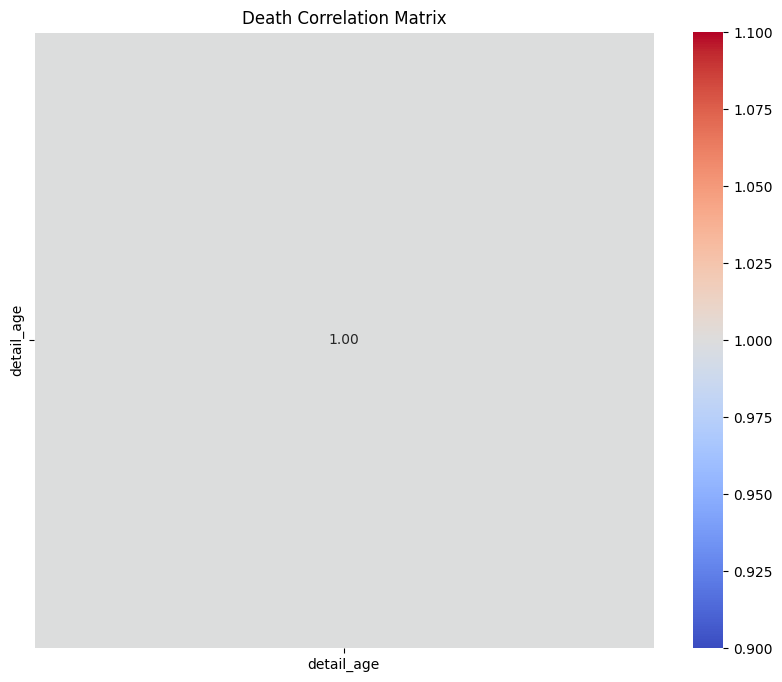

In [ ]:
# Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(death_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Death Correlation Matrix')
# plt.show()

# **Data Mining: Artificial Neural Network**

In [87]:
# import packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout

In [50]:
# select features for model
selected_features = [col for col in sampled_df.columns if col != 'manner_of_death']

target_variable = 'manner_of_death'

In [51]:
# select X and y variables
X = sampled_df[selected_features]
y = sampled_df[target_variable]

In [53]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Basic ANN Model withOUT Hidden Layers

In [100]:
# build the ANN model
model_nolay = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# compile the model
model_nolay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
# train the model
model_nolay.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 [==============================] - 0s 2ms/step - loss: 316.1021 - accuracy: 0.0136
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 282.5829 - accuracy: 0.0212
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 248.9789 - accuracy: 0.0254
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 215.3950 - accuracy: 0.0271
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 181.7838 - accuracy: 0.0271
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 148.3195 - accuracy: 0.0271
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 114.7442 - accuracy: 0.0322
Epoch 8/10
37/37 [==============================] - 0s 1ms/step - loss: 81.4994 - accuracy: 0.0712 
Epoch 9/10
37/37 [==============================] - 0s 1ms/step - loss: 49.9011 - accuracy: 0.2110
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 22.8271 - accuracy: 0.3322


In [111]:
# evaluate the model
loss_nolay, accuracy_nolay = model_nolay.evaluate(X_test, y_test)
print(f"Test accuracy (Model_nolay): {accuracy_nolay}")

16/16 [==============================] - 0s 1ms/step - loss: 10.0108 - accuracy: 0.4300
Test accuracy (Model_nolay): 0.4299802780151367


# Basic ANN Model with Hidden Layers

In [103]:
# build the ANN model --> 3 hidden layers, 64 neurons on 1st, 32 neurons on 2nd, and 1 output neuron on last
model_lay = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_lay.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# train the ANN model
model_lay.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 [==============================] - 1s 1ms/step - loss: 7.4348 - accuracy: 0.8102  
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 1.0583 - accuracy: 0.9949
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 0.8881 - accuracy: 0.9949
Epoch 4/10
37/37 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.9949
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.9949
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.9941
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9949
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9932
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9949
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9873


In [112]:
# evaluate the model
loss_lay, accuracy_lay = model_lay.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_lay}")

16/16 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9921
Test accuracy: 0.9921104311943054


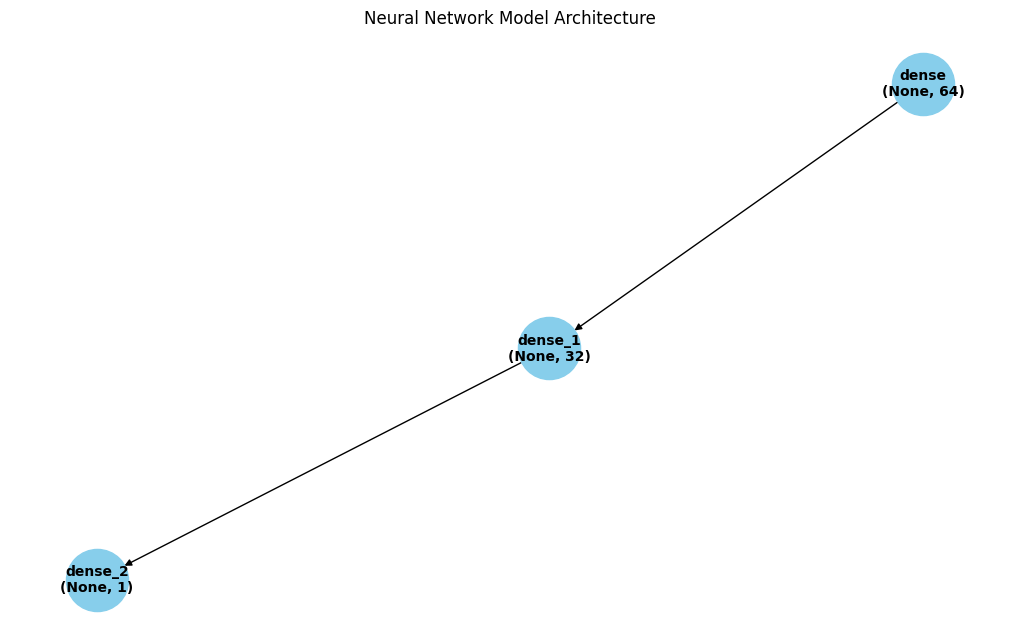

In [106]:
# visualize the ANN model
def visualize_model(model_lay):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture")
    plt.savefig('model_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function to visualize the model
visualize_model(model_lay)

# ANN Model w/ Reduced Complexity

In [113]:
# build model with reduced complexity --> 3 hidden layers, 32 neurons on 1st, 16 neurons on 2nd, and 1 output neuron on last
model_red = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_red.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
# train the model with reduced complexity
model_red.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 [==============================] - 1s 1ms/step - loss: 31.4457 - accuracy: 0.5305
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.9949
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.9949
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.9949
Epoch 5/10
37/37 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.9949
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9949
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.9949
Epoch 8/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9915
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9949
Epoch 10/10
37/37 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.9915


In [115]:
# evaluate the model with reduced complexity
loss_red, accuracy_red = model_red.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy_red}")

16/16 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9901
Test accuracy: 0.990138053894043


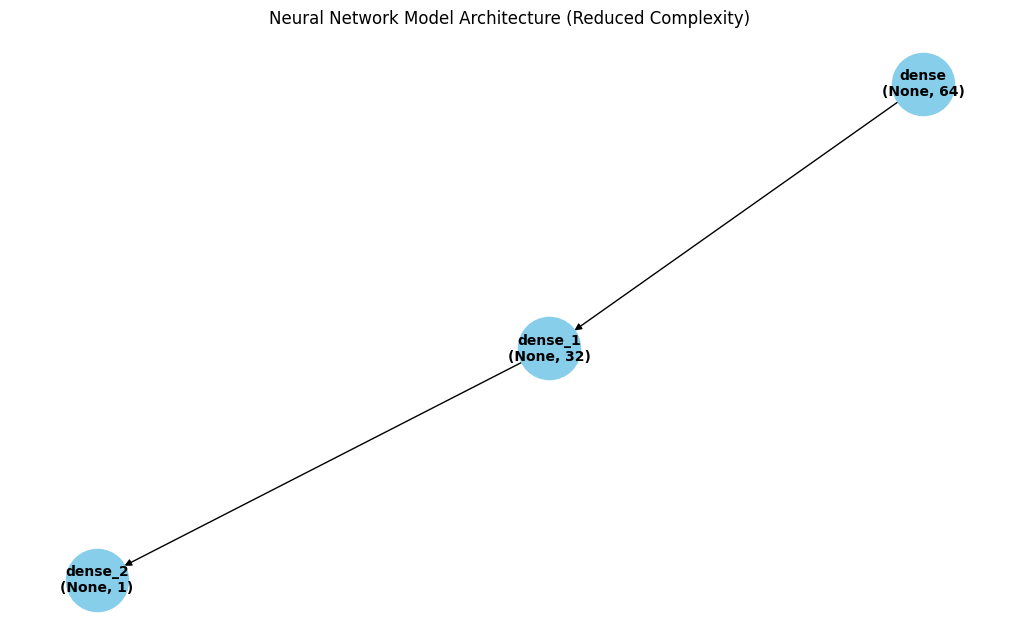

In [116]:
# visualize model with reduced complexity
def visualize_model(model_red):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Reduced Complexity)")
    plt.savefig('model_red_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_red)

# ANN Model with Regularization

In [117]:
# build ANN the model with minimal hidden layers and dropout regularization (discussed in textbook)
model_reg = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    layers.Dense(1, activation='sigmoid')  # Binary classification, hence using 'sigmoid'
])

# Compile the model
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
# train model
model_reg.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 [==============================] - 1s 1ms/step - loss: 119.2632 - accuracy: 0.1407
Epoch 2/10
37/37 [==============================] - 0s 1ms/step - loss: 37.9770 - accuracy: 0.5322
Epoch 3/10
37/37 [==============================] - 0s 1ms/step - loss: 10.0299 - accuracy: 0.8381
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 4.6160 - accuracy: 0.9339
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 3.3419 - accuracy: 0.9534
Epoch 6/10
37/37 [==============================] - 0s 1ms/step - loss: 2.8082 - accuracy: 0.9712
Epoch 7/10
37/37 [==============================] - 0s 1ms/step - loss: 2.8541 - accuracy: 0.9720
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 3.0018 - accuracy: 0.9763
Epoch 9/10
37/37 [==============================] - 0s 1ms/step - loss: 2.7615 - accuracy: 0.9771
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 2.5816 - accuracy: 0.9839


In [119]:
# evaluate model
loss_reg, accuracy_reg = model_reg.evaluate(X_test, y_test)
print(f"Test accuracy (Model_reg): {accuracy_reg}")

16/16 [==============================] - 0s 1ms/step - loss: 3.0505 - accuracy: 0.9921
Test accuracy (Model_reg): 0.9921104311943054


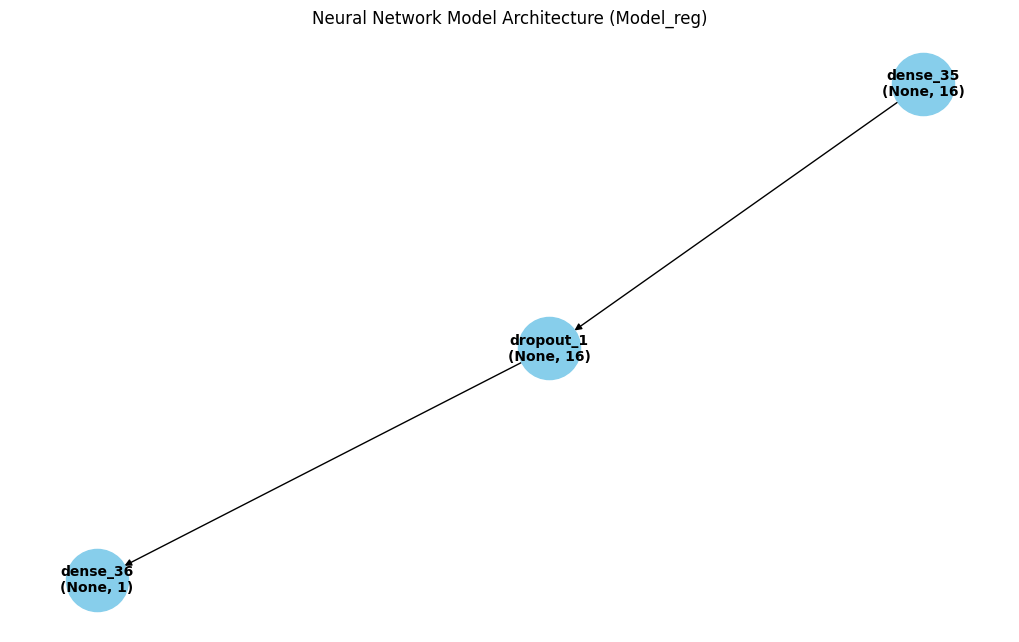

In [120]:
# visualize model with dropout reg
def visualize_model(model):
    G = nx.DiGraph()
    node_labels = {}
    for i, layer in enumerate(model.layers):
        layer_name = f'{layer.name}\n{layer.output_shape}'
        node_labels[i] = layer_name
        G.add_node(layer_name)
        if i > 0:
            G.add_edge(node_labels[i - 1], layer_name)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    plt.title("Neural Network Model Architecture (Model_reg)")
    plt.savefig('model_reg_visualization.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# call function to visualize
visualize_model(model_reg)

# Summary

In [121]:
# model eval values
eval_results = {
    'Model': ['Model_nolay', 'Model_lay', 'Model_red', 'Model_reg'],
    'Test Loss': [loss_nolay, loss_lay, loss_red, loss_reg],
    'Test Accuracy': [accuracy_nolay, accuracy_lay, accuracy_red, accuracy_reg]
}

# create DataFrame for eval results
eval_df = pd.DataFrame(eval_results)

# Display the table
print(eval_df)


         Model  Test Loss  Test Accuracy
0  Model_nolay  10.010842       0.429980
1    Model_lay   0.225187       0.992110
2    Model_red   0.034477       0.990138
3    Model_reg   3.050503       0.992110


In [ ]:
# The 'loss' value in the context of neural network training represents the value of the loss function during the training process.
# The loss function measures how well the model's predictions match the actual target values (ground truth) during training.
# The objective of training a neural network is to minimize this loss function.

# used cross-entropy.